In [51]:
import cPickle
from PIL import Image
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import tensorflow as tf
import random

(600, 365)
(365, 600, 3)


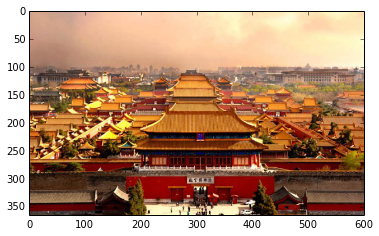

In [3]:
image_filepath = 'images/gugong.jpg'

img = Image.open(image_filepath)
print img.size

img_np = np.asarray(img)
print img_np.shape

%matplotlib inline
imshow(img_np)

In [ ]:
# API for encoding and decoding images
"""
tf.image.decode_and_crop_jpeg
tf.image.decode_bmp
tf.image.decode_gif
tf.image.decode_image
tf.image.decode_jpeg
tf.image.decode_png

tf.image.encode_jpeg
tf.image.encode_png
"""

(365, 600, 3)


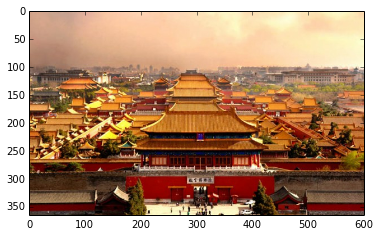

In [6]:
img_string = tf.read_file(image_filepath)
img_decoded = tf.image.decode_image(img_string)
sess = tf.Session()
img_decoded_val = sess.run(img_decoded)
print img_decoded_val.shape
imshow(img_decoded_val)

In [9]:
reverse_img_decoded = tf.constant(img_decoded_val)
reverse_img_string = tf.image.encode_jpeg(reverse_img_decoded)
output_img_path = 'images/output_gugong.jpg'
op = tf.write_file(output_img_path, reverse_img_string)
sess.run(op)

In [ ]:
# API for resize Image
'''
tf.image.resize_area
tf.image.resize_bicubic
tf.image.resize_bilinear
tf.image.resize_images
tf.image.resize_nearest_neighbor
'''

(730, 1200, 3)


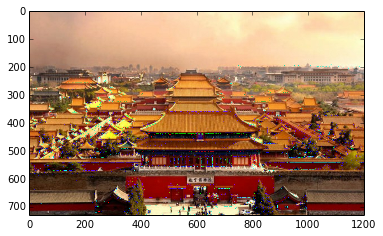

In [20]:
img_string = tf.read_file(image_filepath)
img_decoded = tf.image.decode_image(img_string)
img_decoded = tf.reshape(img_decoded, [-1, 365, 600, 3])

resize_img = tf.image.resize_bicubic(img_decoded, [730, 1200])
resize_img_val = sess.run(resize_img)
resize_img_val = resize_img_val.reshape((730, 1200, 3))
resize_img_val = np.asarray(resize_img_val, np.uint8)

print resize_bicubic_img_val.shape
imshow(resize_bicubic_img_val)

(730, 1200, 3)


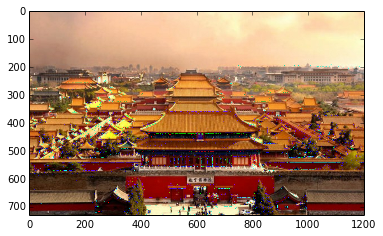

In [22]:
img_string = tf.read_file(image_filepath)
img_decoded = tf.image.decode_image(img_string)
img_decoded = tf.reshape(img_decoded, [-1, 365, 600, 3])

resize_img = tf.image.resize_nearest_neighbor(img_decoded, [730, 1200])
resize_img_val = sess.run(resize_img)
resize_img_val = resize_img_val.reshape((730, 1200, 3))
resize_img_val = np.asarray(resize_img_val, np.uint8)

print resize_bicubic_img_val.shape
imshow(resize_bicubic_img_val)

In [ ]:
# crop image
'''
tf.image.resize_image_with_crop_or_pad
tf.image.pad_to_bounding_box
tf.image.crop_to_bounding_box
tf.random_crop
tf.image.extract_glimpse
'''

(500, 800, 3)


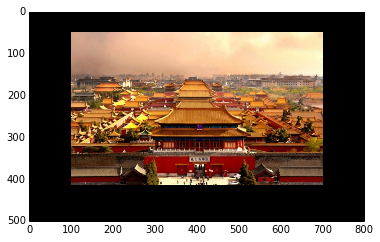

In [23]:
img_string = tf.read_file(image_filepath)
img_decoded = tf.image.decode_image(img_string)
img_decoded = tf.reshape(img_decoded, [-1, 365, 600, 3])

new_img = tf.image.pad_to_bounding_box(img_decoded, 50, 100, 500, 800)
new_img_val = sess.run(new_img)
new_img_val = new_img_val.reshape((500, 800, 3))
new_img_val = np.asarray(new_img_val, np.uint8)

print new_img_val.shape
imshow(new_img_val)

(100, 100, 3)


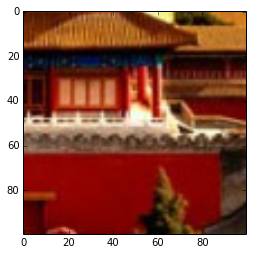

In [31]:
img_string = tf.read_file(image_filepath)
img_decoded = tf.image.decode_image(img_string)
img_decoded = tf.reshape(img_decoded, [1, 365, 600, 3])
img_decoded = tf.cast(img_decoded, tf.float32)

new_img = tf.image.extract_glimpse(img_decoded, [100, 100], [[200, 200]],
                                   normalized=False)
new_img_val = sess.run(new_img)
new_img_val = new_img_val.reshape((100, 100, 3))
new_img_val = np.asarray(new_img_val, np.uint8)

print new_img_val.shape
imshow(new_img_val)

(100, 100, 3)


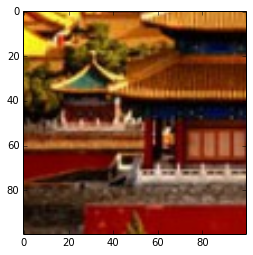

In [33]:
img_string = tf.read_file(image_filepath)
img_decoded = tf.image.decode_image(img_string)

new_img = tf.random_crop(img_decoded, [100, 100, 3])
new_img_val = sess.run(new_img)

print new_img_val.shape
imshow(new_img_val)

In [ ]:
# flip
'''
tf.image.flip_up_down
tf.image.random_flip_up_down
tf.image.flip_left_right
tf.image.random_flip_left_right
tf.image.transpose_image
'''

(365, 600, 3)


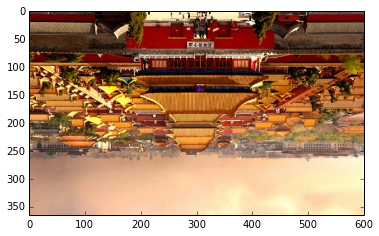

In [34]:
img_string = tf.read_file(image_filepath)
img_decoded = tf.image.decode_image(img_string)
img_decoded = tf.reshape(img_decoded, [1, 365, 600, 3])
img_decoded = tf.cast(img_decoded, tf.float32)

new_img = tf.image.flip_up_down(img_decoded)
new_img_val = sess.run(new_img)
new_img_val = new_img_val.reshape((365, 600, 3))
new_img_val = np.asarray(new_img_val, np.uint8)

print new_img_val.shape
imshow(new_img_val)

In [ ]:
# brightness, contrast, whitening
'''
tf.image.adjust_brightness
tf.image.random_brightness
tf.image.adjust_contrast
tf.image.random_contrast
tf.image.per_image_whitening
tf.image.per_image_standardization
'''

(365, 600, 3)


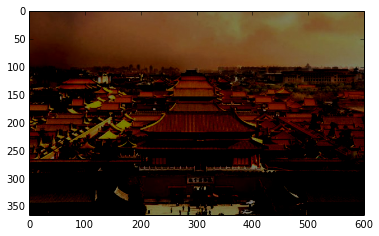

In [42]:
img_string = tf.read_file(image_filepath)
img_decoded = tf.image.decode_image(img_string)

new_img = tf.image.adjust_brightness(img_decoded, -0.5)
new_img_val = sess.run(new_img)

print new_img_val.shape
imshow(new_img_val)

(365, 600, 3)


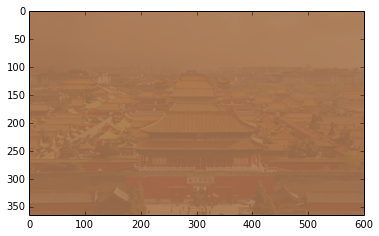

In [44]:
img_string = tf.read_file(image_filepath)
img_decoded = tf.image.decode_image(img_string)

# x = (x-mean) * factor + mean
new_img = tf.image.adjust_contrast(img_decoded, 0.1)

new_img_val = sess.run(new_img)

print new_img_val.shape
imshow(new_img_val)

In [ ]:
# switch from color space
'''
tf.image.rgb_to_grayscale
tf.image.grayscale_to_rgb
tf.image.hsv_to_rgb
tf.image.rgb_to_hsv
tf.image.convert_image_dtype
'''

(365, 600, 3)


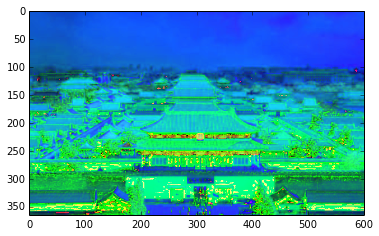

In [52]:
img_string = tf.read_file(image_filepath)
img_decoded = tf.image.decode_image(img_string)
img_decoded = tf.image.convert_image_dtype(img_decoded, tf.float32)

new_img = tf.image.rgb_to_hsv(img_decoded)

new_img_val = sess.run(new_img)

print new_img_val.shape
imshow(new_img_val, cmap=plt.cm.hsv)

(365, 600, 3)


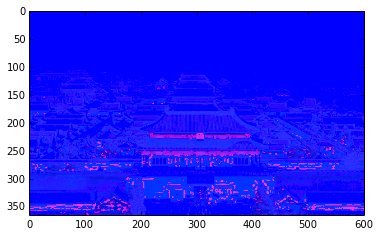

In [55]:
img_string = tf.read_file(image_filepath)
img_decoded = tf.image.decode_image(img_string)

new_img = tf.image.adjust_brightness(img_decoded, 0.8)
new_img = tf.image.convert_image_dtype(new_img, tf.float32)
new_img = tf.image.rgb_to_hsv(new_img)
new_img_val = sess.run(new_img)

print new_img_val.shape
imshow(new_img_val, cmap=plt.cm.hsv)

(365, 600, 3)


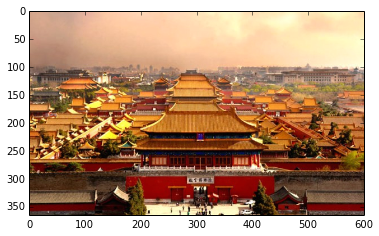

In [58]:
img_string = tf.read_file(image_filepath)
img_decoded = tf.image.decode_image(img_string)

new_img = tf.image.adjust_brightness(img_decoded, 0.01)
new_img = tf.image.convert_image_dtype(new_img, tf.float32)
new_img = tf.image.rgb_to_hsv(new_img)
new_img = tf.image.hsv_to_rgb(new_img)
new_img_val = sess.run(new_img)

print new_img_val.shape
imshow(new_img_val, cmap=plt.cm.hsv)